In [ ]:
# Import dependencies
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Import Downtime Dataset
downtime = pd.read_csv("/content/OEE_V2downtime.csv")

In [ ]:
# Visualize Dataset
downtime.head()

,ID,AssetID,StartDate,EndDate,Reason,Comment,Code,Zone
0,1023245,47.0,03/11/2021 03:24,03/11/2021 03:25,Falla 67: Pin Izquierda Posn Aproximacion,NaN,NaN,NaN
1,1023246,6.0,03/11/2021 03:27,03/11/2021 03:27,20: Robot 1 en Falla,NaN,NaN,NaN
2,1023247,14.0,03/11/2021 03:32,03/11/2021 03:34,Falla al salir pinza,NaN,NaN,NaN
3,1023248,14.0,03/11/2021 03:34,03/11/2021 03:34,Falla al salir pinza,NaN,NaN,NaN
4,1023249,47.0,03/11/2021 03:37,03/11/2021 03:37,Falla 67: Pin Izquierda Posn Aproximacion,NaN,NaN,NaN


In [ ]:
downtime.drop(["Comment","Code","Zone"], axis = 1, inplace = True)

In [ ]:
downtime.head()

,ID,AssetID,StartDate,EndDate,Reason
0,1023245,47.0,03/11/2021 03:24,03/11/2021 03:25,Falla 67: Pin Izquierda Posn Aproximacion
1,1023246,6.0,03/11/2021 03:27,03/11/2021 03:27,20: Robot 1 en Falla
2,1023247,14.0,03/11/2021 03:32,03/11/2021 03:34,Falla al salir pinza
3,1023248,14.0,03/11/2021 03:34,03/11/2021 03:34,Falla al salir pinza
4,1023249,47.0,03/11/2021 03:37,03/11/2021 03:37,Falla 67: Pin Izquierda Posn Aproximacion


In [ ]:
downtime.isnull().sum().sort_values(ascending=True)

ID                0
StartDate         0
AssetID         759
EndDate       27408
Reason       234449
dtype: int64

In [ ]:
totalnulos = downtime.isnull().sum().sum() #Nos permite calcular el total de valores nulos
totalnulos

262616

In [ ]:
totalfilas = len(downtime.index) #nos permite
totalfilas

1048575

In [ ]:
print ("La proporción de datos nulos contra filas existentes es:", totalnulos/totalfilas*100, "%")

La proporción de datos nulos contra filas existentes es: 25.04503731254321 %


In [ ]:
downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   ID         1048575 non-null  int64  
 1   AssetID    1047816 non-null  float64
 2   StartDate  1048575 non-null  object 
 3   EndDate    1021167 non-null  object 
 4   Reason     814126 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


In [ ]:
# Convertir la columna 'StartDate' en tipo datetime
downtime['StartDate'] = pd.to_datetime(downtime['StartDate'], format='%d/%m/%Y %H:%M')

In [ ]:
# Crear las columnas separadas para día, mes, año y hora con minutos
downtime['inicio_dia'] = downtime['StartDate'].dt.day
downtime['inicio_mes'] = downtime['StartDate'].dt.month
downtime['inicio_año'] = downtime['StartDate'].dt.year
downtime['inicio_hora_minutos'] = downtime['StartDate'].dt.strftime('%H:%M')

In [ ]:
downtime.head()

,ID,AssetID,StartDate,EndDate,Reason,inicio_dia,inicio_mes,inicio_año,inicio_hora_minutos
0,1023245,47.0,2021-11-03 03:24:00,03/11/2021 03:25,Falla 67: Pin Izquierda Posn Aproximacion,3,11,2021,03:24
1,1023246,6.0,2021-11-03 03:27:00,03/11/2021 03:27,20: Robot 1 en Falla,3,11,2021,03:27
2,1023247,14.0,2021-11-03 03:32:00,03/11/2021 03:34,Falla al salir pinza,3,11,2021,03:32
3,1023248,14.0,2021-11-03 03:34:00,03/11/2021 03:34,Falla al salir pinza,3,11,2021,03:34
4,1023249,47.0,2021-11-03 03:37:00,03/11/2021 03:37,Falla 67: Pin Izquierda Posn Aproximacion,3,11,2021,03:37


In [ ]:
# Convertir la columna 'EndDate' en tipo datetime
downtime['EndDate'] = pd.to_datetime(downtime['EndDate'], format='%d/%m/%Y %H:%M')

In [ ]:
# Crear las columnas separadas para día, mes, año y hora con minutos
downtime['fin_dia'] = downtime['EndDate'].dt.day
downtime['fin_mes'] = downtime['EndDate'].dt.month
downtime['fin_año'] = downtime['EndDate'].dt.year
downtime['fin_hora_minutos'] = downtime['EndDate'].dt.strftime('%H:%M')

In [ ]:
downtime.head()

,ID,AssetID,StartDate,EndDate,Reason,inicio_dia,inicio_mes,inicio_año,inicio_hora_minutos,fin_dia,fin_mes,fin_año,fin_hora_minutos
0,1023245,47.0,2021-11-03 03:24:00,2021-11-03 03:25:00,Falla 67: Pin Izquierda Posn Aproximacion,3,11,2021,03:24,3.0,11.0,2021.0,03:25
1,1023246,6.0,2021-11-03 03:27:00,2021-11-03 03:27:00,20: Robot 1 en Falla,3,11,2021,03:27,3.0,11.0,2021.0,03:27
2,1023247,14.0,2021-11-03 03:32:00,2021-11-03 03:34:00,Falla al salir pinza,3,11,2021,03:32,3.0,11.0,2021.0,03:34
3,1023248,14.0,2021-11-03 03:34:00,2021-11-03 03:34:00,Falla al salir pinza,3,11,2021,03:34,3.0,11.0,2021.0,03:34
4,1023249,47.0,2021-11-03 03:37:00,2021-11-03 03:37:00,Falla 67: Pin Izquierda Posn Aproximacion,3,11,2021,03:37,3.0,11.0,2021.0,03:37


In [ ]:
downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   ID                   1048575 non-null  int64         
 1   AssetID              1047816 non-null  float64       
 2   StartDate            1048575 non-null  datetime64[ns]
 3   EndDate              1021167 non-null  datetime64[ns]
 4   Reason               814126 non-null   object        
 5   inicio_dia           1048575 non-null  int32         
 6   inicio_mes           1048575 non-null  int32         
 7   inicio_año           1048575 non-null  int32         
 8   inicio_hora_minutos  1048575 non-null  object        
 9   fin_dia              1021167 non-null  float64       
 10  fin_mes              1021167 non-null  float64       
 11  fin_año              1021167 non-null  float64       
 12  fin_hora_minutos     1021167 non-null  object        
dt

In [ ]:
downtime['duracion_paro'] = downtime['EndDate'] - downtime['StartDate']

In [ ]:
downtime.head()

,ID,AssetID,StartDate,EndDate,Reason,inicio_dia,inicio_mes,inicio_año,inicio_hora_minutos,fin_dia,fin_mes,fin_año,fin_hora_minutos,duracion_paro
0,1023245,47.0,2021-11-03 03:24:00,2021-11-03 03:25:00,Falla 67: Pin Izquierda Posn Aproximacion,3,11,2021,03:24,3.0,11.0,2021.0,03:25,0 days 00:01:00
1,1023246,6.0,2021-11-03 03:27:00,2021-11-03 03:27:00,20: Robot 1 en Falla,3,11,2021,03:27,3.0,11.0,2021.0,03:27,0 days 00:00:00
2,1023247,14.0,2021-11-03 03:32:00,2021-11-03 03:34:00,Falla al salir pinza,3,11,2021,03:32,3.0,11.0,2021.0,03:34,0 days 00:02:00
3,1023248,14.0,2021-11-03 03:34:00,2021-11-03 03:34:00,Falla al salir pinza,3,11,2021,03:34,3.0,11.0,2021.0,03:34,0 days 00:00:00
4,1023249,47.0,2021-11-03 03:37:00,2021-11-03 03:37:00,Falla 67: Pin Izquierda Posn Aproximacion,3,11,2021,03:37,3.0,11.0,2021.0,03:37,0 days 00:00:00


In [ ]:
##downtime['duracion_paro'] = downtime['duracion_paro'].dt.total_seconds() / 60

In [ ]:
downtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype          
---  ------               --------------    -----          
 0   ID                   1048575 non-null  int64          
 1   AssetID              1047816 non-null  float64        
 2   StartDate            1048575 non-null  datetime64[ns] 
 3   EndDate              1021167 non-null  datetime64[ns] 
 4   Reason               814126 non-null   object         
 5   inicio_dia           1048575 non-null  int32          
 6   inicio_mes           1048575 non-null  int32          
 7   inicio_año           1048575 non-null  int32          
 8   inicio_hora_minutos  1048575 non-null  object         
 9   fin_dia              1021167 non-null  float64        
 10  fin_mes              1021167 non-null  float64        
 11  fin_año              1021167 non-null  float64        
 12  fin_hora_minutos     1021167 non-null  obj

In [ ]:
valores_unicos = downtime['AssetID'].unique()

In [ ]:
frecuencia_valores = Counter(downtime['AssetID'])

In [ ]:
valores_comunes = frecuencia_valores.most_common()

In [ ]:
print("Valores únicos en la columna:", valores_unicos)
print("Valores más comunes y sus frecuencias:", valores_comunes)

Valores únicos en la columna: [ 47.   6.  14.  15.  45.  18.   8.  13.  10.  11.  17.  38.  43.   7.
  39.  36.  44.  42.  41.  37.  86.  84.  16.  52.  73.  75.  85.  nan
  60.  40. 114.  63.  30. 110.  93.  58.  49.  54.  12.  32.  19.  31.
  95.  22.  50. 113.  24. 112.  23.  25.  28.  51. 101.  46.  91.  29.
  27.  26.  68. 111. 103. 100. 104.  66.  62.  92.  65.  34. 105.  35.
 107.  21.  97.  64.  53.  99.  20.  94.  61.  98.  33. 102.  87. 106.
  96. 115.  76.]
Valores más comunes y sus frecuencias: [(58.0, 362073), (8.0, 82331), (36.0, 64770), (42.0, 64713), (47.0, 64316), (15.0, 55108), (14.0, 53830), (18.0, 50498), (17.0, 36455), (10.0, 28741), (13.0, 25522), (112.0, 21373), (6.0, 19915), (7.0, 11045), (38.0, 9567), (45.0, 9188), (37.0, 8891), (114.0, 7160), (11.0, 6733), (84.0, 6573), (16.0, 5983), (50.0, 5829), (51.0, 5567), (73.0, 5093), (52.0, 4940), (85.0, 4294), (41.0, 4060), (19.0, 3267), (86.0, 3010), (49.0, 2751), (44.0, 2235), (75.0, 1531), (54.0, 1397), (12.0, 1238

In [ ]:
valor_mas_comun, frecuencia_mas_comun = frecuencia_valores.most_common(1)[0]

In [ ]:
nuevo_df = downtime[downtime['AssetID'] == valor_mas_comun]

In [ ]:
print("Nuevo DataFrame con información sobre el valor más común:")
print(nuevo_df)

Nuevo DataFrame con información sobre el valor más común:
            ID  AssetID           StartDate             EndDate Reason  \
841     267473     58.0 2020-11-05 09:29:00 2020-11-05 09:29:00   Idle   
842     267475     58.0 2020-11-05 09:29:00 2020-11-05 09:29:00   Idle   
844     267477     58.0 2020-11-05 09:29:00 2020-11-05 09:29:00    NaN   
845     267480     58.0 2020-11-05 09:30:00 2020-11-05 09:30:00   Idle   
846     267485     58.0 2020-11-05 09:31:00 2020-11-05 09:31:00   Idle   
...        ...      ...                 ...                 ...    ...   
897916  798470     58.0 2021-03-12 20:28:00 2021-03-12 20:28:00   Idle   
897918  798472     58.0 2021-03-12 20:28:00 2021-03-12 20:28:00   Idle   
897920  798474     58.0 2021-03-12 20:28:00 2021-03-12 20:28:00   Idle   
897921  798477     58.0 2021-03-12 20:29:00 2021-03-12 20:29:00   Idle   
897922  798478     58.0 2021-03-12 20:29:00 2021-03-12 20:29:00   Idle   

        inicio_dia  inicio_mes  inicio_año inicio_hor

In [ ]:
nuevo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362073 entries, 841 to 897922
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype          
---  ------               --------------   -----          
 0   ID                   362073 non-null  int64          
 1   AssetID              362073 non-null  float64        
 2   StartDate            362073 non-null  datetime64[ns] 
 3   EndDate              348064 non-null  datetime64[ns] 
 4   Reason               304991 non-null  object         
 5   inicio_dia           362073 non-null  int32          
 6   inicio_mes           362073 non-null  int32          
 7   inicio_año           362073 non-null  int32          
 8   inicio_hora_minutos  362073 non-null  object         
 9   fin_dia              348064 non-null  float64        
 10  fin_mes              348064 non-null  float64        
 11  fin_año              348064 non-null  float64        
 12  fin_hora_minutos     348064 non-null  object         
 13  du

In [ ]:
nuevo_df

,ID,AssetID,StartDate,EndDate,Reason,inicio_dia,inicio_mes,inicio_año,inicio_hora_minutos,fin_dia,fin_mes,fin_año,fin_hora_minutos,duracion_paro
841,267473,58.0,2020-11-05 09:29:00,2020-11-05 09:29:00,Idle,5,11,2020,09:29,5.0,11.0,2020.0,09:29,0 days
842,267475,58.0,2020-11-05 09:29:00,2020-11-05 09:29:00,Idle,5,11,2020,09:29,5.0,11.0,2020.0,09:29,0 days
844,267477,58.0,2020-11-05 09:29:00,2020-11-05 09:29:00,NaN,5,11,2020,09:29,5.0,11.0,2020.0,09:29,0 days
845,267480,58.0,2020-11-05 09:30:00,2020-11-05 09:30:00,Idle,5,11,2020,09:30,5.0,11.0,2020.0,09:30,0 days
846,267485,58.0,2020-11-05 09:31:00,2020-11-05 09:31:00,Idle,5,11,2020,09:31,5.0,11.0,2020.0,09:31,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897916,798470,58.0,2021-03-12 20:28:00,2021-03-12 20:28:00,Idle,12,3,2021,20:28,12.0,3.0,2021.0,20:28,0 days
897918,798472,58.0,2021-03-12 20:28:00,2021-03-12 20:28:00,Idle,12,3,2021,20:28,12.0,3.0,2021.0,20:28,0 days
897920,798474,58.0,2021-03-12 20:28:00,2021-03-12 20:28:00,Idle,12,3,2021,20:28,12.0,3.0,2021.0,20:28,0 days
897921,798477,58.0,2021-03-12 20:29:00,2021-03-12 20:29:00,Idle,12,3,2021,20:29,12.0,3.0,2021.0,20:29,0 days


In [ ]:
nuevo_df.isnull().sum().sort_values(ascending=True)

ID                         0
AssetID                    0
StartDate                  0
inicio_dia                 0
inicio_mes                 0
inicio_año                 0
inicio_hora_minutos        0
EndDate                14009
fin_dia                14009
fin_mes                14009
fin_año                14009
fin_hora_minutos       14009
duracion_paro          14009
Reason                 57082
dtype: int64

In [ ]:
downtime = downtime.dropna(subset=['AssetID'])

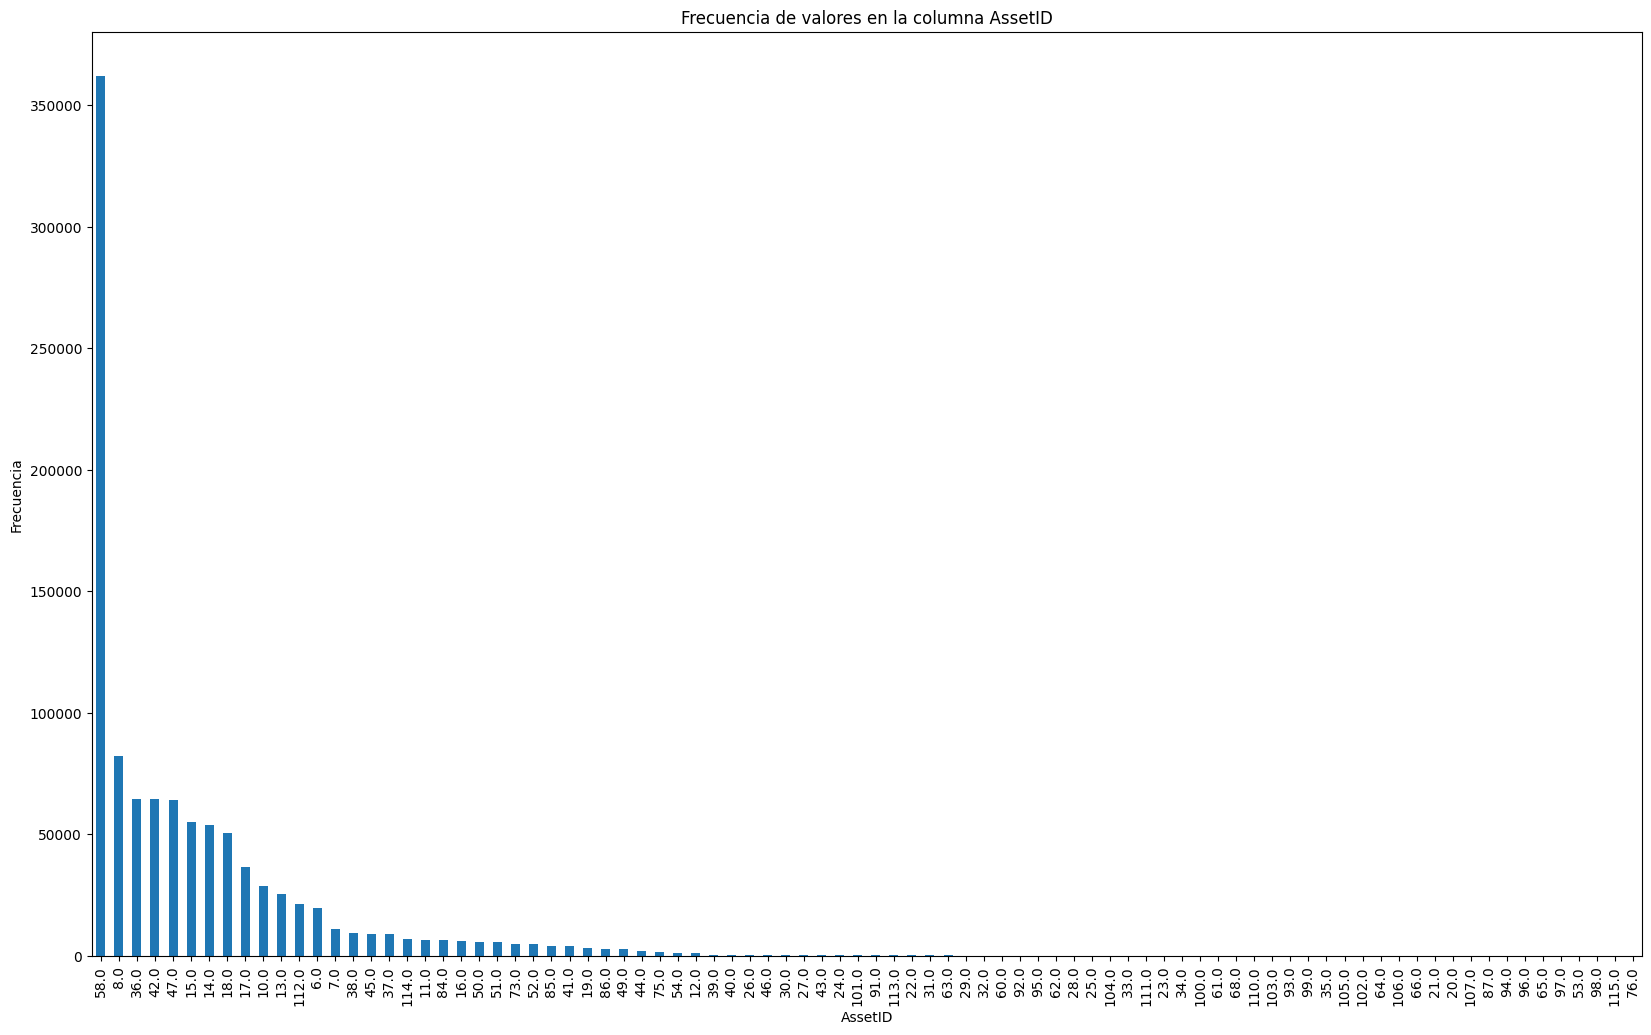

In [ ]:

# Graficar la frecuencia de los valores en la columna 'AssetID'
plt.figure(figsize=(20, 12))
downtime['AssetID'].value_counts().plot(kind='bar')
plt.title('Frecuencia de valores en la columna AssetID')
plt.xlabel('AssetID')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
 #Crear un DataFrame con la cuenta de ocurrencias de cada AssetID
assetid_counts = downtime['AssetID'].value_counts().head(10)

# Obtener los 10 valores de AssetID que más se repiten
top_10_assetids = assetid_counts.index.tolist()

# Filtrar el DataFrame original para incluir solo las filas con los AssetID más comunes
nuevo_df = downtime[downtime['AssetID'].isin(top_10_assetids)].copy()

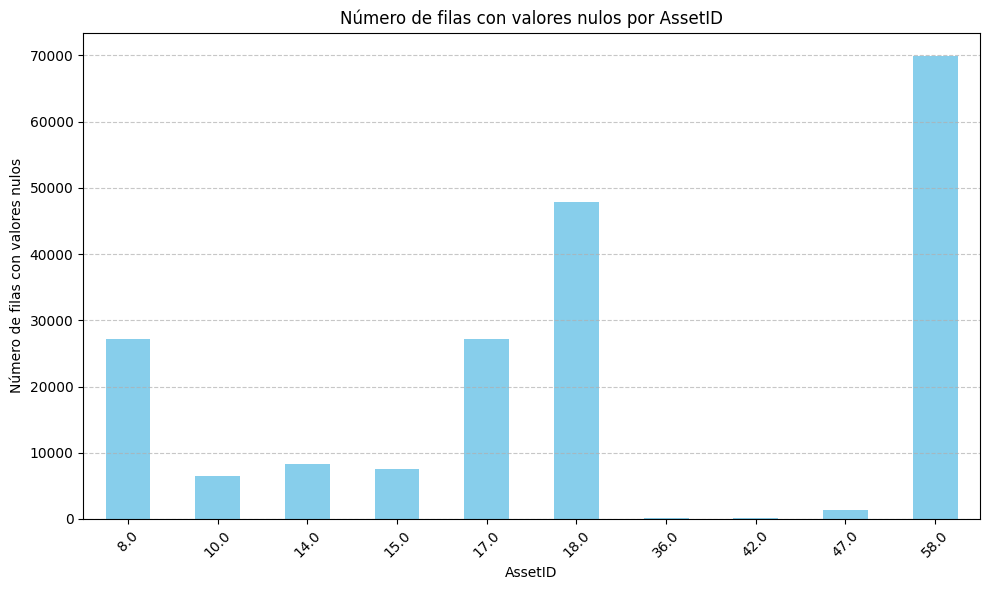

In [ ]:
# Contar las filas que contienen uno o más valores nulos por cada AssetID
filas_nulas_por_assetid = nuevo_df.groupby('AssetID').apply(lambda x: x.isnull().any(axis=1).sum())

# Crear la gráfica
plt.figure(figsize=(10, 6))
filas_nulas_por_assetid.plot(kind='bar', color='skyblue')
plt.title('Número de filas con valores nulos por AssetID')
plt.xlabel('AssetID')
plt.ylabel('Número de filas con valores nulos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

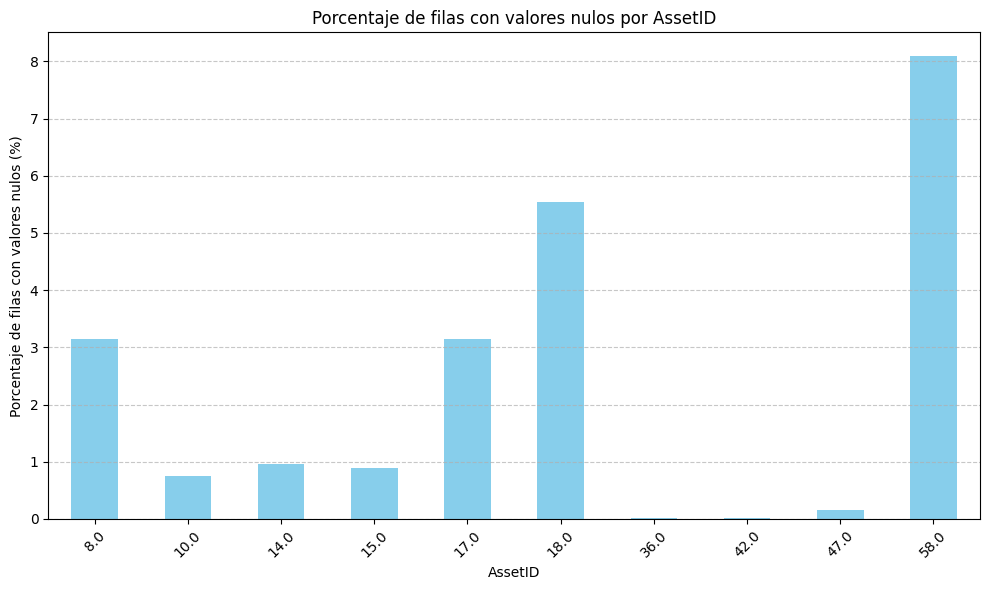

In [ ]:
# Calcular el porcentaje de filas que contienen uno o más valores nulos por cada AssetID
porcentaje_filas_nulas_por_assetid = (nuevo_df.groupby('AssetID').apply(lambda x: x.isnull().any(axis=1).sum()) / len(nuevo_df)) * 100

# Crear la gráfica
plt.figure(figsize=(10, 6))
porcentaje_filas_nulas_por_assetid.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de filas con valores nulos por AssetID')
plt.xlabel('AssetID')
plt.ylabel('Porcentaje de filas con valores nulos (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
nuevo_df_assetid_47 = nuevo_df.loc[nuevo_df['AssetID'] == 47].copy()

# Mostrar el nuevo DataFrame
print(nuevo_df_assetid_47)

In [ ]:
nuevo_df_assetid_18.head()

,ID,AssetID,StartDate,EndDate,Reason,inicio_dia,inicio_mes,inicio_año,inicio_hora_minutos,fin_dia,fin_mes,fin_año,fin_hora_minutos,duracion_paro
18,1023263,18.0,2021-11-03 04:02:00,2021-11-03 04:02:00,NaN,3,11,2021,04:02,3.0,11.0,2021.0,04:02,0 days
30,1023295,18.0,2021-11-03 05:38:00,2021-11-03 05:38:00,NaN,3,11,2021,05:38,3.0,11.0,2021.0,05:38,0 days
38,1023331,18.0,2021-11-03 07:48:00,2021-11-03 07:48:00,NaN,3,11,2021,07:48,3.0,11.0,2021.0,07:48,0 days
91,1023677,18.0,2021-11-03 18:22:00,2021-11-03 18:22:00,NaN,3,11,2021,18:22,3.0,11.0,2021.0,18:22,0 days
92,1023686,18.0,2021-11-03 18:56:00,2021-11-03 18:56:00,NaN,3,11,2021,18:56,3.0,11.0,2021.0,18:56,0 days


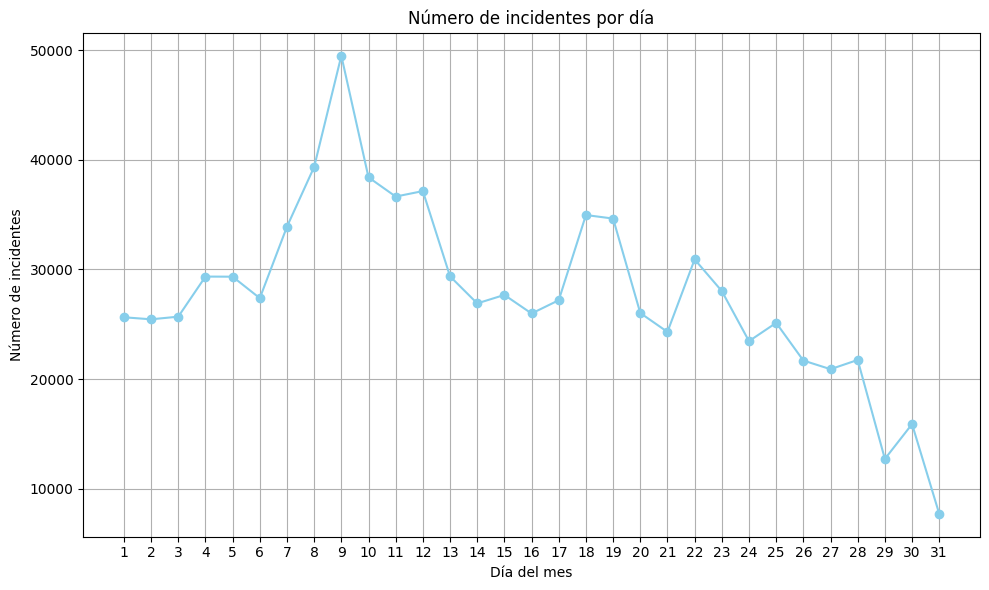

In [ ]:
# Agrupar el DataFrame por el día y contar los incidentes en cada día
incidentes_por_dia = nuevo_df.groupby('inicio_dia').size()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(incidentes_por_dia.index, incidentes_por_dia.values, marker='o', color='skyblue')
plt.title('Número de incidentes por día')
plt.xlabel('Día del mes')
plt.ylabel('Número de incidentes')
plt.xticks(incidentes_por_dia.index)
plt.grid(True)
plt.tight_layout()
plt.show()

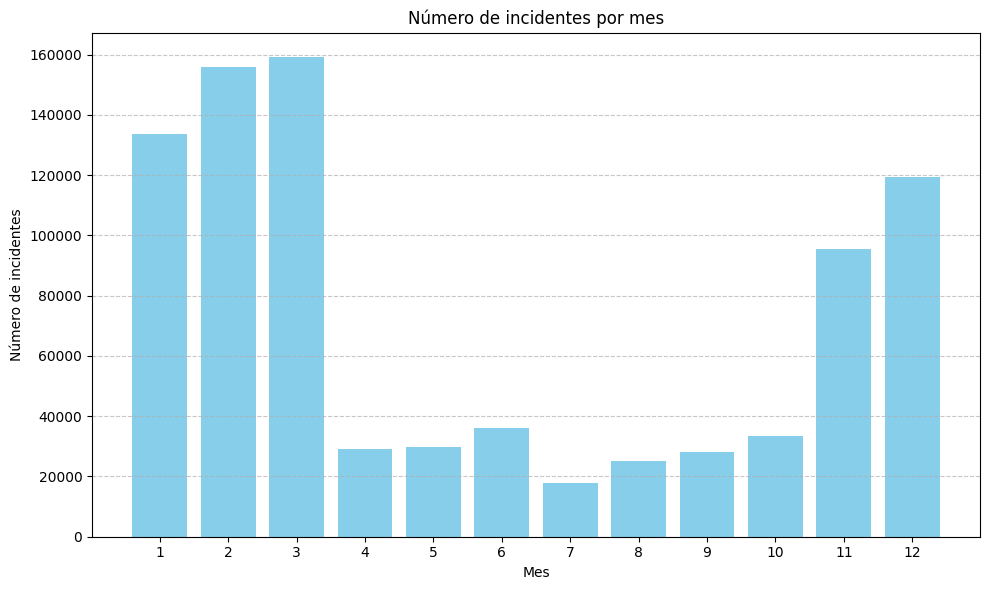

In [ ]:
# Agrupar el DataFrame por el mes y contar los incidentes en cada mes
incidentes_por_mes = nuevo_df.groupby('inicio_mes').size()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(incidentes_por_mes.index, incidentes_por_mes.values, color='skyblue')
plt.title('Número de incidentes por mes')
plt.xlabel('Mes')
plt.ylabel('Número de incidentes')
plt.xticks(incidentes_por_mes.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

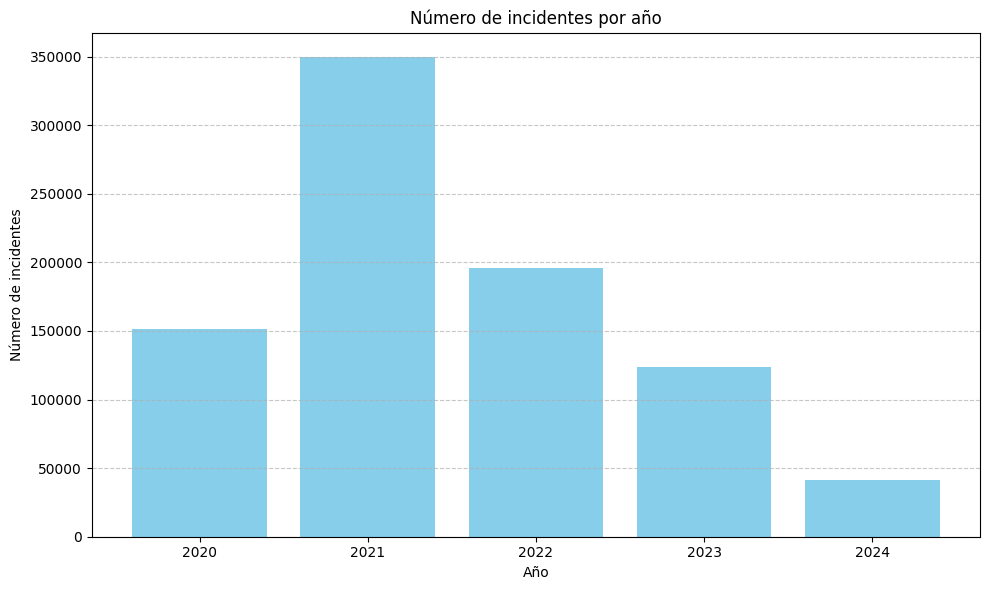

In [ ]:
# Agrupar el DataFrame por el año y contar los incidentes en cada año
incidentes_por_año = nuevo_df.groupby('inicio_año').size()

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.bar(incidentes_por_año.index, incidentes_por_año.values, color='skyblue')
plt.title('Número de incidentes por año')
plt.xlabel('Año')
plt.ylabel('Número de incidentes')
plt.xticks(incidentes_por_año.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()